In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Om du ska köra koden på din dator kan du behöva ändra location
file = r"C:\Users\ericb\Google drive\Tidsserie\GME\Game Stop Data.xlsx"
df = pd.read_excel(file)
df = df.set_index("Date")
df = df.sort_index()

import seaborn
seaborn.set(style='ticks')

import matplotlib
matplotlib.rcParams['text.usetex'] = True

In [2]:
df.head(4)

,Close,Volume,Open,High,Low,No_Short,No_out
Date,,,,,,,
2020-03-09,3.70,2732022.0,3.59,3.97,3.50,NaN,64.3
2020-03-10,4.23,4863169.0,3.94,4.26,3.80,NaN,64.3
2020-03-11,4.14,4414196.0,4.14,4.25,4.00,NaN,64.3
2020-03-12,3.98,5123363.0,3.70,4.04,3.48,NaN,64.3


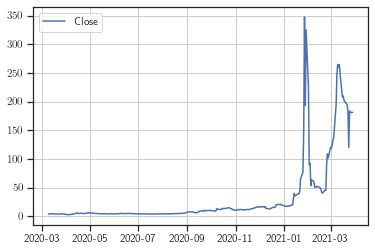

In [3]:
look_at =  ["Close"]
plt.plot(df[look_at])
plt.legend(look_at)
plt.grid(True)
plt.show()

107.94966236955187

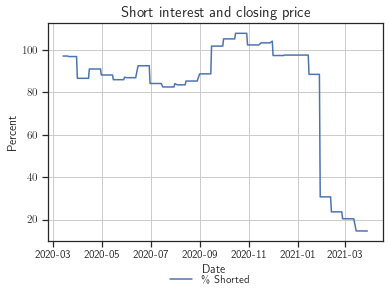

In [4]:
# Andel shortade aktier av total outstanding
df["Perc_short"] = df["No_Short"]/df["No_out"]*10**(-6)*100


fig, ax1 = plt.subplots()
ax1.set_title('Short interest and closing price',fontsize=15)

ax1.set_ylabel("Percent")
ax1.set_xlabel("Date")
ax1.plot(df["Perc_short"],label="\% Shorted")
ax1.grid(True)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04), ncol=2, frameon=False) # ncol = # columns

plt.savefig('a-Short-interest-over-time.pdf',bbox_inches='tight')
df['Perc_short'].max()


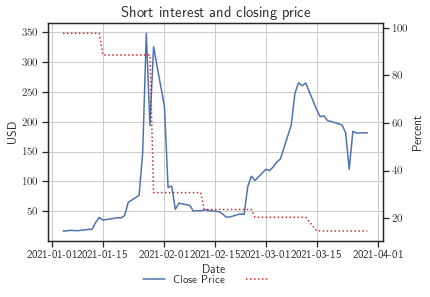

In [5]:
fig, ax1 = plt.subplots()
ax1.set_title('Short interest and closing price',fontsize=15)

ax1.set_xlabel('Date')
ax1.set_ylabel('USD')
ax1.plot(df['Close'][df.index>"2021-01-01"],label='Close Price')
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Percent')
ax2.plot(df['Perc_short'][df.index>"2021-01-01"], color='tab:red',label='% Short',ls=':')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04), ncol=2, frameon=False) # ncol = # columns
plt.savefig('Short-interest-and-closing-price.pdf',bbox_inches='tight')

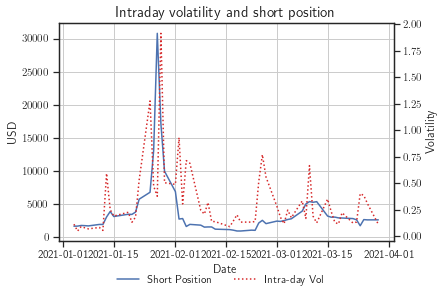

In [6]:
df["intra-day_vol"] = (df['High']-df['Low'])/df['Close']
df['short-position'] = df['Close']*df['Perc_short']

fig, ax1 = plt.subplots()
ax1.set_title('Intraday volatility and short position',fontsize=15)

ax1.set_xlabel('Date')
ax1.set_ylabel('USD')
ax1.plot(df['short-position'][df.index>"2021-01-01"],label='Short Position',ls='-')
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Volatility')
ax2.plot(df['intra-day_vol'][df.index>"2021-01-01"], color='tab:red',label='Intra-day Vol', ls=":")
# {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04), ncol=2, frameon=False) # ncol = # columns
plt.savefig('Intraday-volatility-and-short-position.pdf',bbox_inches='tight')
